# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from matplotlib import cm
from collections import OrderedDict

cmaps = OrderedDict()

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities = cities
url = "http://api.openweathermap.org/data/2.5/weather?"
city = 'Toronto'
uom = 'metric'
citiestest = ['Seoul','Beijing','New York','Tianjin']

cityList = pd.DataFrame(cities, columns=['City'])

In [10]:
#weather = requests.get(url,params).json()

In [11]:
#cityList
cityList.to_csv(r'cityList.csv')

In [12]:
city_df = pd.read_csv('cityList.csv',index_col=[0])

In [13]:
lengthofrow = len(city_df)

In [14]:
#weather

In [15]:
#cityTest = 'zavodoukovsk'
#query_url = url+'appid='+api_key+"&q="+cityTest+"&units=metric"
#weather = requests.get(query_url).json()
#weather
#country -------- weather['sys']['country']
#date ------------weather['dt']
#humidity --------weather['main']['humidity']
#longitude -------weather['coord']['lon']
#latitude --------weather['coord']['lat']
#max_temp --------weather['main']['temp_max']
#wind_speed ------weather['wind']['speed']

In [16]:
city_df['Cloudiness'] = ''
city_df['Country'] = ''
city_df['Date'] = ''
city_df['Humidity'] = ''
city_df['Latitude'] = ''
city_df['Longitude'] = ''
city_df['Max Temp'] = ''
city_df['Wind Speed'] = ''

In [17]:
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,honningsvag,,,,,,,,
1,doctor pedro p. pena,,,,,,,,
2,bluff,,,,,,,,
3,belushya guba,,,,,,,,
4,iqaluit,,,,,,,,


In [18]:
#date ------------response['dt']
#humidity --------response['main']['humidity']
#longitude -------response['coord']['lon']
#latitude --------response['coord']['lat']
#max_temp --------response['main']['temp_max']
#wind_speed ------response['wind']['speed']

for index, row in city_df.iterrows():
    city = row['City']
    params = {
    'units': uom
    ,'appid': api_key
    ,'q': city
    }
    print(f'Processing Record {index} set of {lengthofrow} | {city}')
    response = requests.get(url,params=params).json()
    
    try:
        city_df.loc[index,'Cloudiness']=response['clouds']['all']
        city_df.loc[index,'Country']=response['sys']['country']
        city_df.loc[index,'Date']=response['dt']
        city_df.loc[index,'Humidity']=response['main']['humidity']
        city_df.loc[index,'Longitude']=response['coord']['lon']
        city_df.loc[index,'Latitude']=response['coord']['lat']
        city_df.loc[index,'Max Temp']=response['main']['temp_max']
        city_df.loc[index,'Wind Speed']=response['wind']['speed']
    except KeyError:
        print('missing values, i am going to skip it')
        print('====================================')


Processing Record 0 set of 602 | honningsvag
Processing Record 1 set of 602 | doctor pedro p. pena
missing values, i am going to skip it
Processing Record 2 set of 602 | bluff
Processing Record 3 set of 602 | belushya guba
missing values, i am going to skip it
Processing Record 4 set of 602 | iqaluit
Processing Record 5 set of 602 | tasiilaq
Processing Record 6 set of 602 | antalaha
Processing Record 7 set of 602 | yellowknife
Processing Record 8 set of 602 | el balyana
missing values, i am going to skip it
Processing Record 9 set of 602 | talakan
Processing Record 10 set of 602 | la ronge
Processing Record 11 set of 602 | yuci
Processing Record 12 set of 602 | punta arenas
Processing Record 13 set of 602 | illoqqortoormiut
missing values, i am going to skip it
Processing Record 14 set of 602 | fairbanks
Processing Record 15 set of 602 | ribeira grande
Processing Record 16 set of 602 | arraial do cabo
Processing Record 17 set of 602 | rikitea
Processing Record 18 set of 602 | puksoozer

Processing Record 155 set of 602 | norman wells
Processing Record 156 set of 602 | sumbawa
missing values, i am going to skip it
Processing Record 157 set of 602 | padang
Processing Record 158 set of 602 | mahon
Processing Record 159 set of 602 | port elizabeth
Processing Record 160 set of 602 | yumen
Processing Record 161 set of 602 | bowling green
Processing Record 162 set of 602 | gobabis
Processing Record 163 set of 602 | nizhniy ingash
Processing Record 164 set of 602 | puerto ayora
Processing Record 165 set of 602 | abnub
Processing Record 166 set of 602 | alta floresta
Processing Record 167 set of 602 | hobyo
Processing Record 168 set of 602 | vao
Processing Record 169 set of 602 | mpanda
Processing Record 170 set of 602 | hasaki
Processing Record 171 set of 602 | noumea
Processing Record 172 set of 602 | saint-leu
Processing Record 173 set of 602 | barra de sao francisco
Processing Record 174 set of 602 | luocheng
Processing Record 175 set of 602 | banda aceh
Processing Record 

Processing Record 307 set of 602 | mayo
Processing Record 308 set of 602 | khasan
Processing Record 309 set of 602 | cidreira
Processing Record 310 set of 602 | waipawa
Processing Record 311 set of 602 | wanning
Processing Record 312 set of 602 | bitung
Processing Record 313 set of 602 | polunochnoye
Processing Record 314 set of 602 | dwarka
Processing Record 315 set of 602 | inhambane
Processing Record 316 set of 602 | weinan
Processing Record 317 set of 602 | antibes
Processing Record 318 set of 602 | morehead
Processing Record 319 set of 602 | port-gentil
Processing Record 320 set of 602 | yeletskiy
missing values, i am going to skip it
Processing Record 321 set of 602 | imbituba
Processing Record 322 set of 602 | vostok
Processing Record 323 set of 602 | gayeri
Processing Record 324 set of 602 | yingkou
Processing Record 325 set of 602 | hambantota
Processing Record 326 set of 602 | goderich
Processing Record 327 set of 602 | santa cruz
Processing Record 328 set of 602 | cumana
Pro

Processing Record 468 set of 602 | sataua
missing values, i am going to skip it
Processing Record 469 set of 602 | biak
Processing Record 470 set of 602 | hohhot
Processing Record 471 set of 602 | sao sebastiao
Processing Record 472 set of 602 | geresk
missing values, i am going to skip it
Processing Record 473 set of 602 | husavik
Processing Record 474 set of 602 | grindavik
Processing Record 475 set of 602 | ekibastuz
Processing Record 476 set of 602 | kuito
Processing Record 477 set of 602 | ruatoria
missing values, i am going to skip it
Processing Record 478 set of 602 | kincardine
Processing Record 479 set of 602 | constitucion
Processing Record 480 set of 602 | zuenoula
Processing Record 481 set of 602 | minab
Processing Record 482 set of 602 | bubaque
Processing Record 483 set of 602 | cayenne
Processing Record 484 set of 602 | yeniseysk
Processing Record 485 set of 602 | lewistown
Processing Record 486 set of 602 | mpika
Processing Record 487 set of 602 | taoudenni
Processing R

In [19]:
city_df.head(15)

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,honningsvag,75,NO,1572817643,64,70.98,25.97,2,10.3
1,doctor pedro p. pena,,,,,,,,
2,bluff,71,AU,1572817297,79,-23.58,149.07,21.39,2.36
3,belushya guba,,,,,,,,
4,iqaluit,90,CA,1572817320,73,63.75,-68.52,-3,4.1
5,tasiilaq,80,GL,1572817533,80,65.61,-37.64,-1,1
6,antalaha,68,MG,1572817644,79,-14.9,50.28,25.35,5.98
7,yellowknife,20,CA,1572817531,66,62.45,-114.38,-10.57,3.6
8,el balyana,,,,,,,,
9,talakan,0,RU,1572817644,63,50.29,130.28,-7.82,0.92


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
city_df.to_csv(r'city_df.csv')

In [21]:
citydf = pd.read_csv('city_df.csv',index_col=[0])

In [22]:
citydf.count()

City          602
Cloudiness    534
Country       531
Date          534
Humidity      534
Latitude      534
Longitude     534
Max Temp      534
Wind Speed    534
dtype: int64

In [23]:
citydf =citydf.dropna(how='any')

In [24]:
citydf =citydf.reset_index(drop=True)

In [25]:
citydf.count()

City          531
Cloudiness    531
Country       531
Date          531
Humidity      531
Latitude      531
Longitude     531
Max Temp      531
Wind Speed    531
dtype: int64

In [26]:
def windspeeds(x):
    '''convert MPS Wind Speed to miles per hour'''
    return x * 2.236936

In [27]:
for x in citydf['Wind Speed']:
    citydf['Wind Speed (mph)'] = windspeeds(citydf['Wind Speed'])

In [28]:
def Farenheit(i):
    '''convert Kevlin to Farenheit'''
    return (i-273.15) * 9/5 + 32

In [29]:
for x in citydf['Max Temp']:
    citydf['Max Temp (F)'] = Farenheit(citydf['Max Temp'])

In [30]:
citydf.head(10)

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed,Wind Speed (mph),Max Temp (F)
0,honningsvag,75.0,NO,1.572818e+09,64.0,70.98,25.97,2.00,10.30,23.040441,-456.070
1,bluff,71.0,AU,1.572817e+09,79.0,-23.58,149.07,21.39,2.36,5.279169,-421.168
2,iqaluit,90.0,CA,1.572817e+09,73.0,63.75,-68.52,-3.00,4.10,9.171438,-465.070
3,tasiilaq,80.0,GL,1.572818e+09,80.0,65.61,-37.64,-1.00,1.00,2.236936,-461.470
4,antalaha,68.0,MG,1.572818e+09,79.0,-14.90,50.28,25.35,5.98,13.376877,-414.040
5,yellowknife,20.0,CA,1.572818e+09,66.0,62.45,-114.38,-10.57,3.60,8.052970,-478.696
6,talakan,0.0,RU,1.572818e+09,63.0,50.29,130.28,-7.82,0.92,2.057981,-473.746
7,la ronge,75.0,CA,1.572818e+09,58.0,55.10,-105.30,-4.00,6.70,14.987471,-466.870
8,yuci,0.0,CN,1.572818e+09,93.0,37.68,112.73,3.00,0.13,0.290802,-454.270
9,punta arenas,40.0,CL,1.572818e+09,52.0,-53.16,-70.91,8.00,16.50,36.909444,-445.270


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [31]:
x_axis = citydf['Latitude']

In [32]:
y_axis = citydf['Max Temp']

In [33]:
date = pd.to_datetime(citydf['Date'][0],unit='s')
date = str(date)
date = date[:10]
date = "(" + date + ")"
date

'(2019-11-03)'

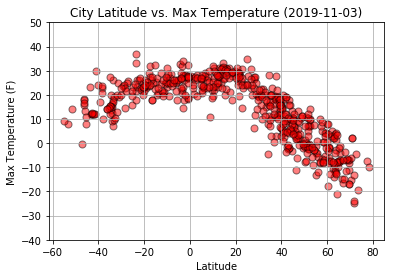

In [34]:

plt.scatter(x_axis,y_axis,alpha=0.5,color='red',edgecolors='black',s=50)
plt.ylim(-40,50)

plt.title(f'City Latitude vs. Max Temperature {date}')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig(os.path.join(f'City Latitude vs Max Temperature.png'))
plt.show()

#### Latitude vs. Humidity Plot

In [63]:
y_axis = citydf['Humidity']

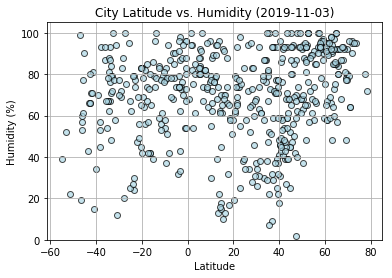

In [64]:
plt.scatter(x_axis,y_axis,alpha=0.7,c='lightblue',edgecolors='black')
plt.ylim(0,105)

plt.title(f'City Latitude vs. Humidity {date}')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig(os.path.join(f'City Latitude vs Humidity.png'))
plt.show()


#### Latitude vs. Cloudiness Plot

In [37]:
y_axis = citydf['Cloudiness']

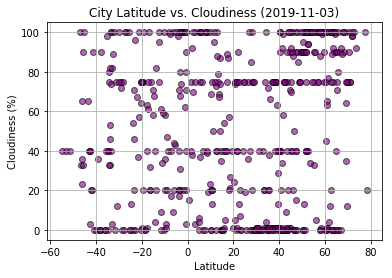

In [38]:
plt.scatter(x_axis,y_axis,alpha=0.6,c='purple',edgecolors='black')
plt.title(f'City Latitude vs. Cloudiness {date}')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig(os.path.join(f'City Latitude vs Cloudiness.png'))
plt.show()

#### Latitude vs. Wind Speed Plot

In [39]:
y_axis = citydf['Wind Speed (mph)']

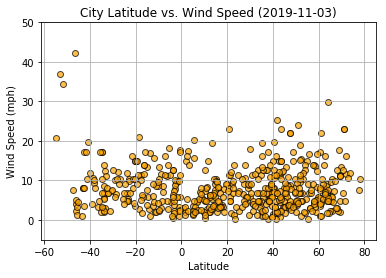

In [40]:
plt.scatter(x_axis,y_axis,alpha=0.7,c='orange',edgecolors='black')
plt.ylim(-5,50)
plt.title(f'City Latitude vs. Wind Speed {date}')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig(os.path.join(f'City Latitude vs Wind Speed.png'))
plt.show()